***
# <font color=blue>UNSUPERVISED LEARNING</font>
# <font color=blue>Practice with Anomaly Detection</font>
# <font color=blue>(lecturer version)</font>
<div style="text-align: right"><font color=magenta>Andrea De Simone</font></div>
***

In [1]:
import numpy as np  
import pandas as pd  
from scipy.stats import multivariate_normal  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

***
# 1. Model-Based Anomaly Detection

## 1.1 Load Dataset 2 (training data)

In [2]:
# Load data
X_tr = np.loadtxt('dataset2_tr.csv', delimiter=',')
print(X_tr.shape)

(307, 2)


In [3]:
def scatter_plot(X):
    
    fig, ax = plt.subplots()
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)
    
    ax.scatter(X[:,0], X[:,1], c='blue', alpha=0.5, marker='x')
    plt.show() 

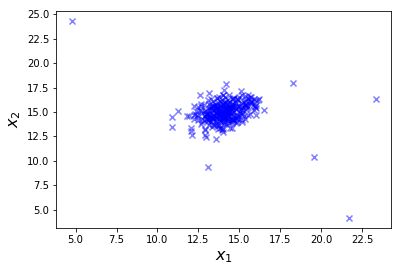

In [4]:
scatter_plot(X_tr)

## 1.2 Gaussian Model

In [5]:
# Gaussian Parameters
mu = np.mean(X_tr, axis=0)
sigma = np.cov(X_tr.T)

print("mean =", mu)
print("covariance = \n",sigma)

p = multivariate_normal.pdf(X_tr,mean=mu, cov=sigma)

mean = [ 14.11225277  14.99767459]
covariance = 
 [[ 1.83866684 -0.22783493]
 [-0.22783493  1.71530264]]


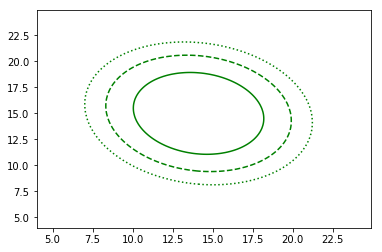

In [6]:
# Plot gaussian levels
fig,ax=plt.subplots()

xx, yy = np.meshgrid(np.arange(4, 25, .1),
                     np.arange(4, 25, .1))
XYpoints = np.c_[xx.ravel(), yy.ravel()] 
Z =  multivariate_normal.pdf(XYpoints,mean=mu, cov=sigma)
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, levels=[1e-7,1e-5,1e-3], 
           colors='green',
           linestyles= ['dotted','dashed','solid'])
plt.show()

## 1.3  Outliers with $p<\epsilon$

### <font color='magenta'>>>> Q1: Complete the function 'gaussian_outliers'. Find number and coordinates of outliers with $p<10^{-5}$</font>

In [7]:
def gaussian_outliers(X, p, epsilon):
    """
    Find coordinates of outliers with p<epsilon
    (where p contains the probability density of each point of the set X)
    """
    # Start Edit
    outliers_idx = np.asarray(np.where(p < epsilon)[0])
    outliers = X[outliers_idx]

    print("Number of outliers = ", outliers.shape[0])
    print("Coordinates of outliers = \n", outliers)
    # End Edit
    
    return(outliers)

In [8]:
# Find outliers
epsilon = 1e-5
outliers = gaussian_outliers(X_tr, p, epsilon)


Number of outliers =  5
Coordinates of outliers = 
 [[ 13.079    9.3479]
 [ 21.727    4.1262]
 [ 19.583   10.412 ]
 [ 23.34    16.299 ]
 [  4.7526  24.35  ]]


In [9]:
def plot_outliers_with_contour(X, outliers, eps):

    mu = np.mean(X, axis=0)
    sigma = np.cov(X.T)

    fig,ax=plt.subplots()

    xx, yy = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, .1),
                         np.arange(X[:,1].min()-1, X[:,1].max()+1, .1))
    XYpoints = np.c_[xx.ravel(), yy.ravel()] 
    Z =  multivariate_normal.pdf(XYpoints,mean=mu, cov=sigma)
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[eps], colors='green',linestyles='dashed')
    ax.plot(X[:,0],X[:,1], marker='x',c='blue',linestyle = 'None')  
    ax.plot(outliers[:,0], outliers[:,1], marker='s',c='red',linestyle = 'None')  
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)
    plt.show()

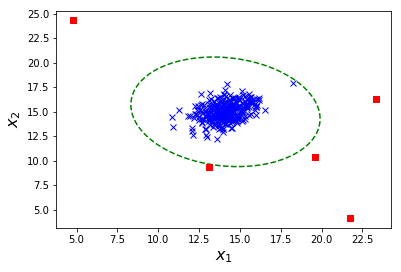

In [10]:
plot_outliers_with_contour(X_tr, outliers, epsilon)

### <font color='magenta'>>>> Q2: find number and coordinates of outliers with $p<10^{-2}$ and $p<10^{-8}$</font>

Number of outliers =  16
Coordinates of outliers = 
 [[ 12.074   13.067 ]
 [ 12.956   12.437 ]
 [ 11.249   15.133 ]
 [ 14.182   17.834 ]
 [ 10.859   14.479 ]
 [ 10.882   13.462 ]
 [ 13.603   12.203 ]
 [ 12.933   12.624 ]
 [ 12.13    12.667 ]
 [ 12.04    13.345 ]
 [ 13.079    9.3479]
 [ 21.727    4.1262]
 [ 19.583   10.412 ]
 [ 23.34    16.299 ]
 [ 18.261   17.978 ]
 [  4.7526  24.35  ]]


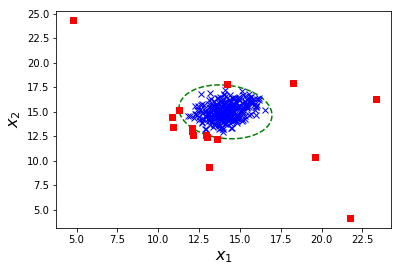

In [11]:
# Start Edit
epsilon = 1e-2

outliers = gaussian_outliers(X_tr, p, epsilon)
# End Edit

plot_outliers_with_contour(X_tr, outliers, epsilon)

Number of outliers =  3
Coordinates of outliers = 
 [[ 21.727    4.1262]
 [ 23.34    16.299 ]
 [  4.7526  24.35  ]]


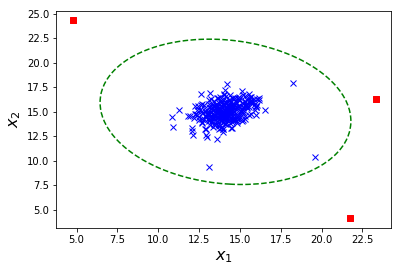

In [12]:
# Start Edit
epsilon = 1e-8

outliers = gaussian_outliers(X_tr, p, epsilon)
# End Edit

plot_outliers_with_contour(X_tr, outliers, epsilon)

## 1.5 Load dataset 2 (validation data)

In [13]:
# Load CV data (X_cv != X_tr)
X_cv = np.loadtxt('dataset2_cv.csv', delimiter=',')
Y_cv = np.loadtxt('dataset2_cv_labels.csv')
print(Y_cv[:10])
print(X_cv.shape)
print(Y_cv.shape)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
(307, 2)
(307,)


## 1.5 Optimal threshold $\epsilon$

In [14]:
mu_cv = np.mean(X_cv, axis=0)
sigma_cv = np.cov(X_cv.T)
p_cv = multivariate_normal.pdf(X_cv,mean=mu_cv, cov=sigma_cv)

### <font color='magenta'>>>> Q3: complete function 'select_epsilon' by defining the variables 'tp' (True Positives), 'fp' (False Positives) and 'fn' (False Negatives) </font>

In [15]:
def select_epsilon(prob_cv, y_cv):
    
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    stepsize = (prob_cv.max() - prob_cv.min()) / 1000

    for epsilon in np.arange(prob_cv.min(),prob_cv.max(),stepsize):
        
        preds = (prob_cv < epsilon) 
        
        # Start Edit
        # True Positives (predicted 1, actual 1)
        tp = np.sum(np.logical_and(preds == 1, y_cv == 1)).astype(float)
        # False Positives (predicted 1, actual 0)
        fp = np.sum(np.logical_and(preds == 1, y_cv == 0)).astype(float)
        # True Negatives (predicted 0, actual 1)
        fn = np.sum(np.logical_and(preds == 0, y_cv == 1)).astype(float)
        # End Edit
        
        # Precision
        if (tp + fp) != 0:
            precision = tp / (tp + fp)
        else:
            precision = 0

        # Recall
        if (tp + fn) != 0:
            recall = tp / (tp + fn)
        else:
            recall = 0

        # F1-score
        if (precision + recall) != 0:                
            f1 = (2 * precision * recall) / (precision + recall)
        else:
            f1 = 0       
            
        if f1 > best_f1:
            best_epsilon = epsilon
            best_f1 = f1
       
    return(best_epsilon, best_f1)

In [16]:
optimal_epsilon, f1score = select_epsilon(p_cv, Y_cv)
print("optimal epsilon=",optimal_epsilon)
print("optimal f1-score =",f1score)

optimal epsilon= 8.70194278732e-05
optimal f1-score = 0.875


Number of outliers =  6
Coordinates of outliers = 
 [[ 13.079    9.3479]
 [ 21.727    4.1262]
 [ 19.583   10.412 ]
 [ 23.34    16.299 ]
 [ 18.261   17.978 ]
 [  4.7526  24.35  ]]


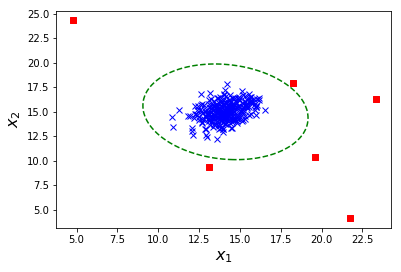

In [17]:
# Apply optimal epsilon to unlabelled (training) data

mu = np.mean(X_tr, axis=0)
sigma = np.cov(X_tr.T)
p = multivariate_normal.pdf(X_tr,mean=mu, cov=sigma)

outliers = gaussian_outliers(X_tr, p, optimal_epsilon)

plot_outliers_with_contour(X_tr, outliers, optimal_epsilon)

***
# 2. Distance-Based Anomaly Detection

## 2.1 Compute Nearest Neighbors distances

In [18]:
K=5

nbrs = NearestNeighbors(n_neighbors=K,algorithm='kd_tree').fit(X_tr)

dist, _ = nbrs.kneighbors(X_tr,  n_neighbors = K+1, return_distance=True)

print(dist[:5])

[[ 0.          0.05408327  0.09209777  0.09436631  0.10830051  0.1239879 ]
 [ 0.          0.11947385  0.14729902  0.24941933  0.26102107  0.26956446]
 [ 0.          0.03008322  0.09276314  0.18264994  0.1907092   0.20271408]
 [ 0.          0.12349089  0.1908743   0.24568679  0.30836666  0.34836906]
 [ 0.          0.24495102  0.27071202  0.27721833  0.31192467  0.31505714]]


In [19]:
dist_Kth = dist[:,-1] # distances to the Kth NN

In [20]:
# Append kth-NN distance to point coordinates (3rd dimension)
X_ext = np.concatenate((X_tr, dist_Kth[:,np.newaxis]),axis=1)
print(X_ext[:5])

[[ 13.047       14.741        0.1239879 ]
 [ 13.409       13.763        0.26956446]
 [ 14.196       15.853        0.20271408]
 [ 14.915       16.174        0.34836906]
 [ 13.577       14.043        0.31505714]]


In [21]:
def scatter_plot_with_distances(X, dist):
    # Input is coordinate array X and the array of distances to the Kth NN
    fig, ax = plt.subplots()

    ax.xaxis.set_tick_params(labelsize=12, direction='inout', length=6, width=1, color='gray')
    ax.yaxis.set_tick_params(labelsize=12, direction='inout', length=6, width=1, color='gray')
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)

    sc = ax.scatter(X[:,0], X[:,1], c=dist, cmap='brg', alpha=.5, marker='x',s=100)
    cb = plt.colorbar(sc)
    cb.set_label('distance to $k^{th}$ nearest neighbor')
    plt.show() 

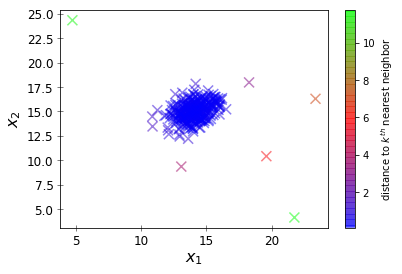

In [22]:
scatter_plot_with_distances(X_tr, dist[:,-1])

In [23]:
# Sort from smallest to largest kNN distance
X_ext_sorted = X_ext[X_ext[:,-1].argsort()]
print(X_ext_sorted[:5])
print("")
print(X_ext_sorted[-5:])


print("\nhighest kNN distance:             ", X_ext_sorted[-1])
print("second to highest kNN distance: ", X_ext_sorted[-2])

[[ 14.192       15.365        0.09558766]
 [ 14.256       15.042        0.09871677]
 [ 14.245       15.085        0.10062306]
 [ 14.253       15.031        0.10131634]
 [ 14.354       15.023        0.10131634]]

[[ 13.079        9.3479       3.72205024]
 [ 19.583       10.412        5.77984334]
 [ 23.34        16.299        7.17764202]
 [  4.7526      24.35        11.51862625]
 [ 21.727        4.1262      11.73723106]]

highest kNN distance:              [ 21.727        4.1262      11.73723106]
second to highest kNN distance:  [  4.7526      24.35        11.51862625]


## 2.2 Top n outliers

### <font color='magenta'>>>> Q4: Find coordinates of top 5 outliers (the 5 points with the largest kNN distances). Find the coordinates of the 'normal' (not anomalous) points. </font>

In [24]:
# Select top n outliers
n_outliers = 5

# Start Edit
outliers = X_ext_sorted[-n_outliers:, :-1]
normal = X_ext_sorted[:-n_outliers, :-1]
# End Edit

In [25]:
def plot_outliers(normal, outliers):
        
    fig,ax=plt.subplots()
        
    ax.plot(normal[:,0],normal[:,1], marker='x',c='blue',linestyle = 'None')  
    ax.plot(outliers[:,0], outliers[:,1], marker='s',c='red',linestyle = 'None')  
    
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)
    plt.show()

Number of outliers = 5


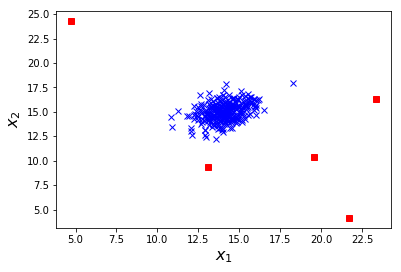

In [26]:
print("Number of outliers =", outliers.shape[0])
plot_outliers(normal,outliers)

## 2.3 Outliers with KNN distance > threshold

### <font color='magenta'>>>> Q5: Complete the function 'KNN_outliers'. Find coordinates of points whose Kth-NN distance > threshold (outliers) and Kth-NN distance $\leq$ threshold (normal points).</font>

In [27]:
def KNN_outliers(x_sorted, threshold):
    """
    Given array 'x_sorted' of coordinates and KNN-distances 
    (sorted in ascending order of KNN distance),
    find coordinates of outliers with KNN-distance > threshold
    and coordinates of normal points with KNN-distance <= threshold
    """
    
    # Start Edit
    outliers_idx = np.asarray(np.where(x_sorted[:,-1] > threshold))
    normal_idx = np.asarray(np.where(x_sorted[:,-1] <= threshold))

    outliers = x_sorted[outliers_idx, :-1][0]
    normal = x_sorted[normal_idx, :-1][0]
    
    print("Number of outliers = ", outliers.shape[0])
    print("Coordinates of outliers = \n", outliers)
    # End Edit
    
    return(normal, outliers)

Number of outliers =  12
Coordinates of outliers = 
 [[ 12.619   16.772 ]
 [ 13.603   12.203 ]
 [ 11.249   15.133 ]
 [ 14.182   17.834 ]
 [ 10.859   14.479 ]
 [ 10.882   13.462 ]
 [ 18.261   17.978 ]
 [ 13.079    9.3479]
 [ 19.583   10.412 ]
 [ 23.34    16.299 ]
 [  4.7526  24.35  ]
 [ 21.727    4.1262]]


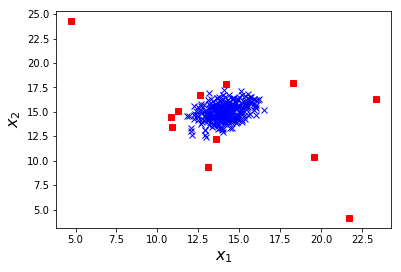

In [28]:
# Select outliers with KNN-distance > 1
threshold = 1

normal, outliers = KNN_outliers(X_ext_sorted, threshold)

plot_outliers(normal,outliers)

## 2.4 Optimal threshold $thr$

In [29]:
# Use CV dataset

K=5

nbrs = NearestNeighbors(n_neighbors=K,algorithm='kd_tree').fit(X_cv)

dist, _ = nbrs.kneighbors(X_cv,  n_neighbors = K+1, return_distance=True)
dist_Kth = dist[:,-1] # distances to the Kth NN

# Append kth-NN distance to point coordinates (3rd dimension)
X_cv_ext = np.concatenate((X_cv, dist_Kth[:,np.newaxis]),axis=1)

# Sort from smallest to largest kNN distance
X_cv_ext_sorted = X_cv_ext[X_cv_ext[:,-1].argsort()]

### <font color='magenta'>>>> Q6: complete function 'select_threshold' by defining the variables 'tp' (True Positives), 'fp' (False Positives) and 'fn' (False Negatives). [Same as you did for 'select_epsilon' in Q3] </font>

In [30]:
def select_threshold(x_sorted, y_cv):
    
    best_threshold = 0
    best_f1 = 0
    f1 = 0
    
    stepsize = (x_sorted[:,-1].max() - x_sorted[:,-1].min()) / 1000

    for threshold in np.arange(x_sorted[:,-1].min(),x_sorted[:,-1].max(),stepsize):
        
        preds = ( x_sorted[:,-1] > threshold ) 

        # Start Edit
        # True Positives (predicted 1, actual 1)
        tp = np.sum(np.logical_and(preds == 1, y_cv == 1)).astype(float)
        # False Positives (predicted 1, actual 0)
        fp = np.sum(np.logical_and(preds == 1, y_cv == 0)).astype(float)
        # True Negatives (predicted 0, actual 1)
        fn = np.sum(np.logical_and(preds == 0, y_cv == 1)).astype(float)
        # End Edit
        
        # Precision
        if (tp + fp) != 0:
            precision = tp / (tp + fp)
        else:
            precision = 0

        # Recall
        if (tp + fn) != 0:
            recall = tp / (tp + fn)
        else:
            recall = 0

        # F1-score
        if (precision + recall) != 0:                
            f1 = (2 * precision * recall) / (precision + recall)
        else:
            f1 = 0       
        
        if f1 > best_f1:
            best_threshold = threshold            
            best_f1 = f1
         
    return(best_threshold, best_f1)

In [31]:
optimal_threshold, f1score = select_threshold(X_cv_ext_sorted,Y_cv)
print("optimal threshold=", optimal_threshold)
print("optimal f1-score =", f1score)

optimal threshold= 2.35480586356
optimal f1-score = 0.875


Number of outliers =  6
Coordinates of outliers = 
 [[ 18.261   17.978 ]
 [ 13.079    9.3479]
 [ 19.583   10.412 ]
 [ 23.34    16.299 ]
 [  4.7526  24.35  ]
 [ 21.727    4.1262]]


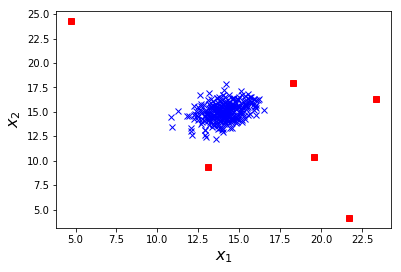

In [32]:
# Select outliers with KNN-distance > optimal threshold
threshold = optimal_threshold

normal, outliers = KNN_outliers(X_ext_sorted, threshold)

plot_outliers(normal,outliers)